<a href="https://colab.research.google.com/github/Namesakenberg/Hyperparameter-Hangout/blob/main/Questios_on_T_tests_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

### Task-1
Suppose we have a dataset containing the math test scores of two different schools, and we want to determine if there is a significant difference between the mean math scores of the two schools. The null hypothesis is that the mean math scores of the two schools are equal, and the alternative hypothesis is that they are not equal. Using a significance level of 0.05, perform an independent two-sample t-test on the data and interpret the results.

Dataset:
```
School A: [75, 80, 90, 85, 70, 75, 80, 85, 90, 95, 80, 75, 85, 90, 95, 80, 75, 70, 85, 90, 95, 75, 70, 80, 85]
School B: [80, 75, 85, 90, 95, 70, 75, 80, 85, 90, 85, 75, 80, 90, 95, 85, 75, 70, 80, 90, 85, 70, 75, 80, 85]
```
Question 1: Perform normality test and equal variance test for both schools.

Question 2: Is there a significant difference between the mean math scores of the two schools?

In [2]:
school_A= [75, 80, 90, 85, 70, 75, 80, 85, 90, 95, 80, 75, 85, 90, 95, 80, 75, 70, 85, 90, 95, 75, 70, 80, 85]
school_B= [80, 75, 85, 90, 95, 70, 75, 80, 85, 90, 85, 75, 80, 90, 95, 85, 75, 70, 80, 90, 85, 70, 75, 80, 85]

In [3]:
# solution 1 :
n1 = len(school_A)
n2 = len(school_B)
from scipy.stats import shapiro
statistic_A,shapiro_A = shapiro(school_A)
statistic_B,shapiro_B = shapiro(school_B)

In [4]:
print("shapiro's pvalue for school  A : ",shapiro_A)
print("shapiro's pvalue for school  B : ",shapiro_B)

shapiro's pvalue for school  A :  0.09971981078559489
shapiro's pvalue for school  B :  0.144976120199184


In [5]:
# since both the p values > 0.05(alpha) it follows normal distribution

In [6]:
from scipy.stats import levene
levene(school_A,school_B)


LeveneResult(statistic=0.09599999999999974, pvalue=0.7580248392839517)

In [7]:
# pvalue > alpha hence both of them have equal variance

In [8]:
# solution 2
# perform t tes on independent columns

from scipy.stats import ttest_ind
tstat , p_val= ttest_ind(school_A,school_B)
p_val

0.8551029845205448

In [9]:
# since the pvalue is greater than alpha we fail to  reject null hpothesis
# hece the mean scores are same

### Task 2:
Suppose we have a dataset containing the weights (in pounds) of 30 randomly selected male college students and 25 randomly selected female college students. We want to test if there is a significant difference in the average weight between male and female college students using a significance level of 0.05. Perform an independent two-sample t-test on the data and interpret the results.

Dataset:
```
Male Students: [155, 165, 170, 160, 180, 175, 185, 165, 175, 170, 165, 160, 180, 190, 195, 200, 185, 175, 170, 160, 180, 185, 190, 195, 200, 180, 175, 170, 160, 175]
Female Students: [125, 130, 135, 120, 140, 130, 135, 125, 115, 120, 130, 125, 140, 130, 135, 125, 115, 120, 130, 125, 140, 130, 135, 125, 115]
```

In [10]:
male_stu = [155, 165, 170, 160, 180, 175, 185, 165, 175, 170, 165, 160, 180, 190, 195, 200, 185, 175, 170, 160, 180, 185, 190, 195, 200, 180, 175, 170, 160, 175]
female_sample = [125, 130, 135, 120, 140, 130, 135, 125, 115, 120, 130, 125, 140, 130, 135, 125, 115, 120, 130, 125, 140, 130, 135, 125, 115]
# male student count != female student count
# draw 25 samples out of male
male_sample = []
import random
male_sample = random.sample(male_stu,25)
male_sample = np.array(male_sample)
male_sample

array([165, 175, 170, 170, 185, 185, 195, 190, 175, 190, 180, 200, 160,
       175, 170, 175, 180, 195, 185, 160, 175, 180, 160, 165, 155])

<Axes: ylabel='Density'>

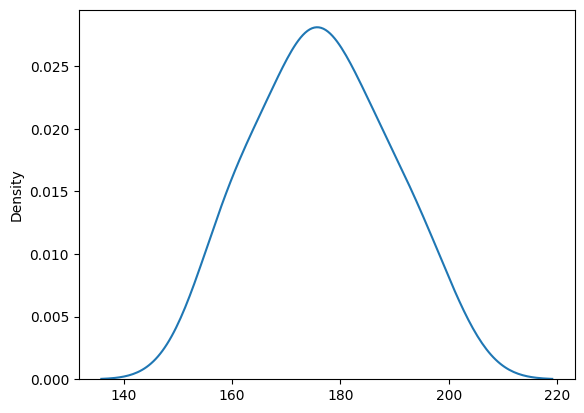

In [11]:
#since both of them has 25 samples , proving that it follows normal distribution
sns.kdeplot(male_sample)

<Axes: ylabel='Density'>

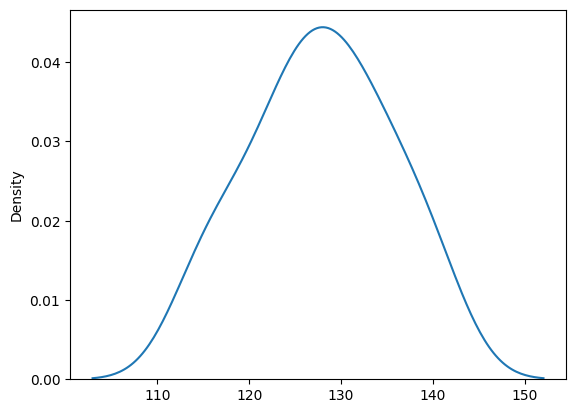

In [12]:
sns.kdeplot(female_sample)

In [13]:
from scipy.stats import shapiro
shapiro_male = shapiro(male_sample)
shaprio_female= shapiro(female_sample)
print('male_shaprio : ',shapiro_male)
print('female_shaprio : ',shaprio_female)

male_shaprio :  ShapiroResult(statistic=0.971119529771982, pvalue=0.6735690039383361)
female_shaprio :  ShapiroResult(statistic=0.9377318161663691, pvalue=0.13119264166977973)


In [14]:
# since both iof thbe p values are greater than 0.05 , both of them are normally distributed

In [15]:
# checking for equal variance using levene test
from scipy.stats import levene
levene_val = levene(male_sample , female_sample)
levene_val

LeveneResult(statistic=3.729032258064514, pvalue=0.059391608994156644)

In [16]:
# since levene's pvalue > 0.05 both have equal variance

In [17]:
from scipy.stats import t
t_statistic ,pvalue  = ttest_ind(male_sample , female_sample)
print(pvalue)

5.889847930637296e-22


In [18]:
# since p value is very close to 0 and is smaller than 0.05 we reject the null hypothiesis
# null hypothiesis is false
# the average weight of male != avg weight of females

### Task 3:
A professor wants to know if her introductory statistics class has a good grasp of basic math. Six students are chosen at random from the class and given a math proficiency test. The professor wants the class to be able to score above 70 on the test. The six students get scores of 62, 92, 75, 68, 83, and 95. Can the professor have 90 percent confidence that the mean score for the class on the test would be above 70?


In [32]:
sample_marks = [62, 92, 75, 68, 83, 95]
n = len(sample_marks)
X = 70
mu = np.mean(sample_marks)
dev = np.std(sample_marks)
alpha = 1-0.9  # significance level = 1-confidence level

<Axes: ylabel='Density'>

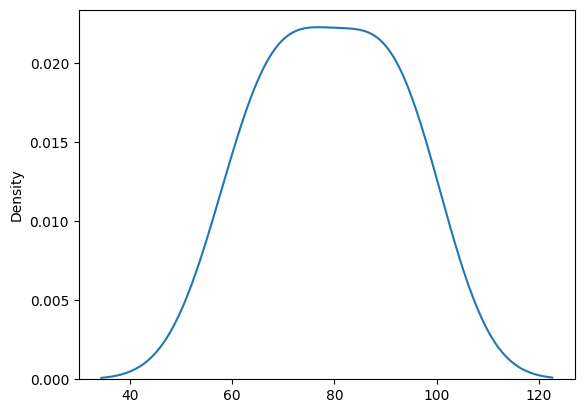

In [33]:
sns.kdeplot(sample_marks)

In [34]:
from scipy.stats import ttest_1samp
ttest_1samp(sample_marks,X,alternative='greater',nan_policy='omit')

TtestResult(statistic=1.7053136360191492, pvalue=0.07442681355650134, df=5)

In [35]:
# since pvalue < alpha the null hypothesis cannot be rejected
# hence the class will be able to score marks above 70

### Task 4:
An experiment is conducted to determine whether intensive tutoring (covering a great deal of material in a fixed amount of time) is more effective than paced tutoring (covering less material in the same amount of time). Two randomly chosen groups are tutored separately and then administered proficiency tests. Use a significance level of α < 0.05.

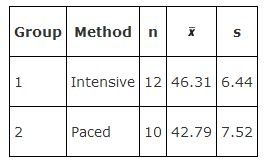

In [ ]:
# null hypothesis : intensive = paced
# alt hypotheis  : intensive > paced

In [37]:
# use Ttest_independentsamp
n1 = 12
x1 = 46.31
s1 = 6.44

n2 = 10
x2 = 42.79
s2 =7.52

# check if bothe the samples follow the normal distribution
# check if both the samples have equal variance
# use Ttest_indsamp

Tstat = (x1-x2)/((((s1)**2)/n1)+(((s2)**2)/n2))**0.5
Tstat

1.1661529333715528

In [39]:
p_value=t.cdf(Tstat,(n1+n2-2))

In [41]:
print(1-p_value)

0.12863554588284487


In [ ]:
# since the p_value is greater than the alpha 0.05 failed to reject the null hypothesis
# hence the efficiency of intensive != paced

### Task 5:
Estimate a 90 percent confidence interval for the difference between the number of raisins per box in two brands of breakfast cereal.

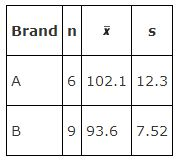

In [43]:

n1 = 6
x1  = 102.1
s1 = 12.3

n2 =9
x2 =93.6
s2 =7.52

alpha = 1-0.9

In [52]:
pointestimate = x1-x2

dof  = min(n1-1 , n2-1)

std_error = ((((s1)**2)/n1)+(((s2)**2)/n2))**0.5

Tval = 2.015

moe  = std_error*Tval

lower_bound = pointestimate-moe
upperbound = pointestimate+moe

print(f'the interval is {lower_bound} to {upperbound}')

the interval is -2.808868241905456 to 19.808868241905458
